# Digital Image Processing quiz # 2

### Names:

In [1]:
import cv2
import ipywidgets as widgets
import numpy as np

from ipywidgets import interact, fixed
from matplotlib import pyplot as plt


In [2]:
def img_blend(img_1, img_2, alpha):
    img_2 = cv2.resize(img_2, img_1.shape)
    blend_img = alpha * img_1 + (1 - alpha) * img_2

    plt.imshow(blend_img, cmap='gray'); plt.show()
    plt.axis('off')

<b>1. </b> Create a function convolve which performs manuel convolution between and image and a kernel of size 3. You are only allowed to use numpy's flip operation within the function. This function will have as input parameters the image and kernel. You can choose between black or white padding

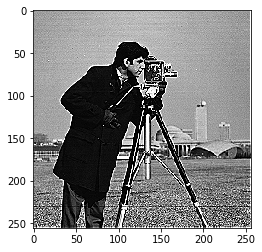

In [3]:
img = cv2.imread('/Users/jorge/Documents/DigitalImageProcessing/PS1/cameraman.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3)) / 9 
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

def convolve(img, kernel):
    # Flip kernel.
    kernel = np.flipud(np.fliplr(kernel))

    # Create output matrix.
    out_img = np.zeros(img.shape)

    # Pad image with zeros.
    height, width = img.shape
    padded_img = np.zeros((height + 2, width + 2))
    padded_img[1:-1, 1:-1] = img

    # Run the convolution.
    for row in range(height):
        for col in range(width):
            out_img[col, row] = (kernel * padded_img[col : col + 3, row : row + 3]).sum()
    return out_img
            
out_img = convolve(img, kernel)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255); plt.show()

<b>2. </b> Create a function that performs image blending between two grayscale images. The operation is given with the following formula.

$$ g(x, y) = T[f_1(x, y), f_2(x, y)] = \alpha * f_1(x, y) + (1 - \alpha) * f_2(x, y) $$


In [4]:
img_1 = cv2.imread('/Users/jorge/Documents/DigitalImageProcessing/PS1/cameraman.png', cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread('/Users/jorge/Documents/DigitalImageProcessing/PS1/moon.jpg', cv2.IMREAD_GRAYSCALE)

alpha_slider = widgets.FloatSlider(min=0.0, max=1.0, value=0.5, step=0.1, description='alpha')
interact(img_blend, img_1=fixed(img_1), img_2=fixed(img_2), alpha=alpha_slider);


interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0), Output()), _dom_classes=('widget-interact',))